# Salvando frames espaçados

In [ ]:
from google.colab import drive
import os
import sys
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
drive.mount('/content/drive', force_remount=True)

# FOLDERNAME = 'repo'
# sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
sys.path.append('/content/drive/My Drive/repo/codes')
from utils import video_utils

Mounted at /content/drive


In [ ]:
counter = 0
images_num = [1]
STRING_BODY = 'frame_{}.jpeg'
IMAGE_PATH = '/content/drive/My Drive/repo/dataFrame/all_frames'
DATA_FRAME_PATH = '/content/drive/My Drive/repo/dataFrame'

Agora escrever um algoritmo que faça a soma cumulativa dos resultados de phase_correlation e retorne a quantidade de somas que realizou para retornar a distância em pixels desejada.

In [ ]:
def cumulative_sum (data_frame_path, image_path, translation = 100):
  df = pd.read_csv(data_frame_path)
  x = df['x']
  y = df['y']
  c = df['c']

  frame = np.array(Image.open(image_path + '/frame_0001.jpeg'))
  translation = frame.shape[0] - 100

  counter = 0
  aux = 0
  while aux < translation:
    if (abs(df['y'][counter]) > abs(df['x'][counter])):
      aux += abs(df['y'][counter])
    counter += 1
  return aux, counter

In [ ]:
df = pd.read_csv(DATA_FRAME_PATH + '/phase_correlation.csv')
x = df['x']
y = df['y']
c = df['c']
frame = np.array(Image.open(IMAGE_PATH + '/frame_0001.jpeg'))
translation = frame.shape[0] - 100

counter = 0
for i in range(86):
  aux = 0
  while aux < translation:
    if (abs(df['y'][counter]) > abs(df['x'][counter])):
      aux += abs(df['y'][counter])
    counter += 1
  images_num.append(counter)


In [ ]:
NEW_PATH = '/content/drive/My Drive/repo/dataFrame/frames_s_100/'

In [ ]:
print(images_num)

[1, 75, 148, 222, 296, 365, 436, 511, 585, 659, 735, 808, 876, 952, 1027, 1414, 1487, 1560, 1638, 1713, 1793, 1869, 1946, 2018, 2094, 2173, 2248, 2324, 2403, 2479, 2558, 2640, 2720, 2801, 3283, 3407, 3483, 3557, 3631, 3709, 3787, 3865, 3938, 4014, 4093, 4143, 4193, 4269, 4345, 4419, 4489, 4563, 4635, 4705, 4772, 5146, 5234, 5308, 5385, 5464, 5538, 5614, 5691, 5765, 5842, 5920, 5999, 6082, 6166, 6250, 6333, 6742, 6819, 6897, 6977, 7057, 7135, 7209, 7283, 7356, 7420, 7469, 7531, 7608, 7685, 7743, 7816]


In [ ]:
arquivo = open('script.sh', 'w')
for i in images_num:
  string = "cp '" + IMAGE_PATH + '/' + STRING_BODY.format('{:04d}'.format(i)) + "' '" + NEW_PATH + STRING_BODY.format('{:04d}'.format(i)) + "'\n"
  arquivo.write(string)
arquivo.close()


In [ ]:
# !bash script.sh

# Tentando fazer interpolação

In [ ]:
df = pd.read_csv(DATA_FRAME_PATH + '/phase_correlation.csv')
x = df['x']
y = df['y']
c = df['c']
frame = np.array(Image.open(IMAGE_PATH + '/frame_0001.jpeg'))
translation = frame.shape[0] - 100

counter = 0
for i in range(86):
  aux = 0
  while aux < translation:
    if (abs(df['y'][counter]) > abs(df['x'][counter])):
      aux += abs(df['y'][counter])
    counter += 1
  images_num.append(counter)

In [ ]:
x = np.linspace(0, 2 * np.pi, frame.shape[1])
y = np.sin(2 * np.pi * x / 8)**2

In [ ]:
# frame.shape[1]
for i in y:
  if i >= 0:
    print (i)

# RASCUNHO DA TRANSFORMADA


In [ ]:
from google.colab import drive
import os
import sys
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
drive.mount('/content/drive', force_remount=True)

# FOLDERNAME = 'repo'
# sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
sys.path.append('/content/drive/My Drive/repo/codes')
from utils import video_utils

Mounted at /content/drive


In [ ]:
IMAGE_PATH = '/content/drive/My Drive/repo/dataFrame/all_frames'

In [ ]:
frame = np.array(Image.open(IMAGE_PATH + '/frame_0001.jpeg'))

In [ ]:
x = np.linspace(0, np.pi, image1.shape[0])
y = np.sin(x)**2

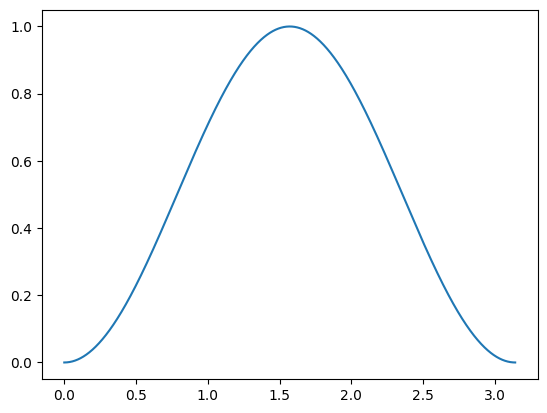

In [ ]:
plt.plot(x,y)

In [ ]:
aux = np.identity(y.shape[0])
aux.shape

(2160, 2160)

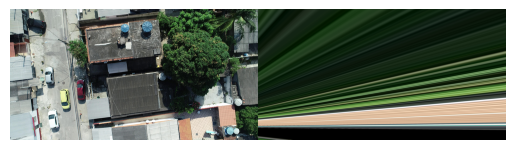

In [ ]:
import cv2
import numpy as np

def stitch_images(image1, image2):
    # Detectar pontos chave e descritores usando o algoritmo ORB
    orb = cv2.ORB_create()
    keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

    # Encontrar correspondências entre os pontos chave das duas imagens
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Selecionar as melhores correspondências
    num_good_matches = 50
    good_matches = matches[:num_good_matches]

    # Extrair os pontos chave correspondentes das duas imagens
    src_points = np.float32([keypoints1[match.queryIdx].pt for match in good_matches]).reshape(-1, 1, 2)
    dst_points = np.float32([keypoints2[match.trainIdx].pt for match in good_matches]).reshape(-1, 1, 2)

    # Calcular a matriz de homografia usando os pontos chave correspondentes
    M, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)

    # Aplicar a matriz de homografia para alinhar as duas imagens
    result = cv2.warpPerspective(image1, M, (image1.shape[1] + image2.shape[1], image1.shape[0]))
    result[0:image2.shape[0], 0:image2.shape[1]] = image2

    return result

# Exemplo de uso:
# Carregar as duas imagens que você deseja unir (substitua 'image1.jpg' e 'image2.jpg' pelos caminhos das suas imagens)
image1 = cv2.imread(NEW_PATH +'frame_0001.jpeg')
image2 = cv2.imread(NEW_PATH + 'frame_0075.jpeg')

# Chamar a função para realizar o stitching
result_image = stitch_images(image1, image2)

# Exibir a imagem resultante
# cv2.imshow('Imagem Panorâmica', result_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(result_image,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
# print('image size: ', frame_size)

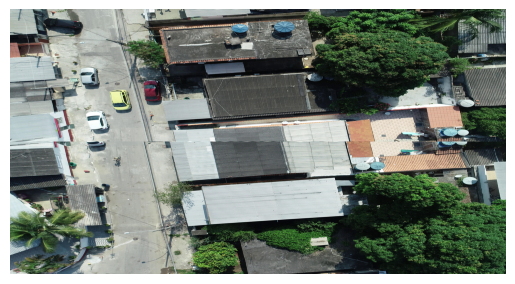

In [ ]:
def concatenate_images(image1, image2):
    # Obter as alturas das duas imagens
    height1, height2 = image1.shape[0], image2.shape[0]

    # Verificar qual das duas imagens é mais alta e ajustar a outra imagem para a mesma altura
    if height1 < height2:
        image1 = cv2.resize(image1, (int(image1.shape[1] * height2 / height1), height2))
    elif height2 < height1:
        image2 = cv2.resize(image2, (int(image2.shape[1] * height1 / height2), height1))

    # Concatenar as duas imagens lado a lado
    concatenated_image = np.hstack((image1, image2))

    return concatenated_image

def concatenate_images_vertical(image1, image2):
    # Obter as larguras das duas imagens
    width1, width2 = image1.shape[1], image2.shape[1]

    # Verificar qual das duas imagens é mais larga e ajustar a outra imagem para a mesma largura
    if width1 < width2:
        image1 = cv2.resize(image1, (width2, int(image1.shape[0] * width2 / width1)))
    elif width2 < width1:
        image2 = cv2.resize(image2, (width1, int(image2.shape[0] * width1 / width2)))

    # Concatenar as duas imagens verticalmente
    concatenated_image = np.vstack((image1, image2))

    return concatenated_image

def concatenate_images_with_overlap(image1, image2, overlap_pixels = 100):
    # Verificar se a quantidade de pixels de sobreposição é válida
    if overlap_pixels <= 0:
        raise ValueError("A quantidade de pixels de sobreposição deve ser maior que zero.")

    # Definir as regiões de interesse em cada imagem para sobreposição
    roi_image1 = image1[:, -overlap_pixels:]
    roi_image2 = image2[:, :overlap_pixels]

    # Calcular a largura da região de sobreposição
    overlap_width = roi_image1.shape[1]

    # Calcular a largura resultante da imagem após a concatenação
    result_width = image1.shape[1] + image2.shape[1] - overlap_width

    # Redimensionar as duas imagens para a largura resultante
    image1_resized = cv2.resize(image1, (result_width, image1.shape[0]))
    image2_resized = cv2.resize(image2, (result_width, image2.shape[0]))

    # Concatenar as duas imagens
    concatenated_image = np.vstack((image1_resized, image2_resized))

    return concatenated_image

result_image = concatenate_images_with_overlap(image2, image1)
plt.imshow(cv2.cvtColor(result_image,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

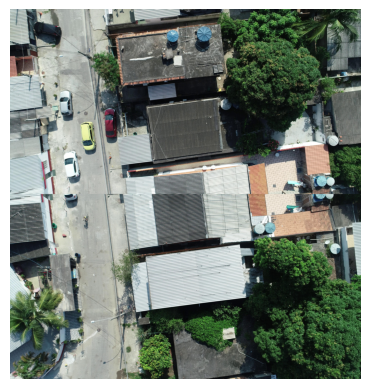

In [ ]:
result_image = concatenate_images_vertical(image2, image1)
plt.imshow(cv2.cvtColor(result_image,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
import cv2
import numpy as np

def convolve_with_sine_kernel(image, center_weight=1.0, edge_weight=0.2):
    # Verificar se a imagem é colorida e converter para tons de cinza, se necessário
    # if len(image.shape) == 3:
    #     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Criar um kernel senoidal para enfatizar os pixels do centro da imagem
    rows, cols, channel = image.shape
    y = np.arange(rows).reshape(-1, 1)
    sine_kernel = center_weight + edge_weight * np.sin(np.pi * (y - rows / 2) / (rows / 2))
    sine_kernel = np.repeat(sine_kernel, cols, axis=1)

    # Normalizar o kernel para garantir que os valores estejam entre 0 e 1
    sine_kernel = sine_kernel / np.max(sine_kernel)

    # Aplicar a convolução usando o kernel senoidal
    convolved_image = []
    for i in (0, channel-1):
      convolved_image.append(np.multiply(image, sine_kernel))

    return convolved_image

# Exemplo de uso:
# Carregar as duas imagens que você deseja unir (substitua 'image1.jpg' e 'image2.jpg' pelos caminhos das suas imagens)
# image1 = cv2.imread('image1.jpg')
# image2 = cv2.imread('image2.jpg')

# Converter as imagens para escala de cinza
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Definir os pesos para enfatizar os pixels do centro e da borda da imagem (ajuste estes valores conforme necessário)
center_weight = 1.0
edge_weight = 0.2

# Realizar a convolução com o kernel senoidal em ambas as imagens
convolved_image1 = convolve_with_sine_kernel(image1, center_weight, edge_weight)
convolved_image2 = convolve_with_sine_kernel(image2, center_weight, edge_weight)

# Concatenar as imagens convolucionadas com sobreposição (utilizando o algoritmo anterior)
overlap_pixels = 100
result_image = concatenate_images_with_overlap(convolved_image1, convolved_image2, overlap_pixels)
# Exibir a imagem resultante
result_image = concatenate_images_vertical(convolved_image2, convolved_image1)
# result_image = cv2.cvtColor(result_image, cv2.COLOR_GRAY2BGR)
# plt.imshow(cv2.cvtColor(result_image,cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()
print(image1_gray.shape)
print(result_image.shape)
print(image1.shape)

ValueError: ignored

In [ ]:
from PIL import Image
imagem = Image.fromarray(cv2.cvtColor(result_image,cv2.COLOR_BGR2RGB))
imagem.save('result_image.jpeg','JPEG')

In [ ]:
import numpy as np
center_weight = 1.0
edge_weight = 0.2
sine_kernel = center_weight + edge_weight * np.sin(np.pi * (y - rows / 2) / (rows / 2))
sine_kernel = np.repeat(sine_kernel, cols, axis=1)
# Normalizar o kernel para garantir que os valores estejam entre 0 e 1
sine_kernel = sine_kernel / np.max(sine_kernel)
sine_kernel

NameError: ignored